

# **EDA**




In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

**Cargar dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/dataset_inventario.csv', delimiter=';')
df.head()

,EDAD,SEXO,PATENTE_COMERCIAL,TIPO_OPERACION,TIPO,BANCA,CALIFICACION,MEDIO,CANAL,APROB_SCORING,...,EXCEP_PROCESO,TIPO_PROCESO,VIA_INGRESO,INGRESO_CLIENTE_DESEMBOLSO,RECHAZO_CARGA,TIPO_COBRO,HABILITA_BNF_LAB,CIUDAD_LABORAL,CIUDAD_PARTICULAR,ATRASO_30
0,57,F,,205,Renovado,240,MB,95,CANAL APP ...,S/D,...,S,MAN,ELYON,7695350.0,0,PAGO,N,ASUNCION,CAPIATA,NO
1,57,F,S/D,205,Renovado,240,EXE,95,TELEVENTAS ...,S/D,...,N,MAN,SGC,6000000.0,0,PAGO,N,ASUNCION,FERNANDO DE LA MORA,NO
2,63,M,N,205,Renovado,240,EXE,95,TELEMARKETING ...,SC,...,N,AUT,SGC,8308724.0,0,PAGO,N,ASUNCION,LIMPIO,NO
3,57,M,S/D,203,Renovado,240,M,1,NEGOFIN ...,S/D,...,N,MAN,SGC,7756679.0,0,PAGO,N,MARIANO ROQUE ALONSO,MARIANO ROQUE ALONSO,SI
4,56,F,S/D,205,Renovado,240,EXE,95,TELEMARKETING ...,S/D,...,N,AUT,SGC,2300000.0,0,PAGO,N,ASUNCION,ASUNCION,NO


**Ver las columnas**

In [ ]:
df.columns

Index(['EDAD', 'SEXO', 'PATENTE_COMERCIAL', 'TIPO_OPERACION', 'TIPO', 'BANCA',
       'CALIFICACION', 'MEDIO', 'CANAL', 'APROB_SCORING', 'APROB_LINEA',
       'MONTO_DESEMBOLSO', 'MONTO_LIQUIDO', 'MONTO_CUOTA', 'CUOTAS_TOTAL',
       'CUOTAS_PENDIENTE', 'ESTADO', 'TASA', 'SCORE_BICSA', 'TIPO_APROBACION',
       'MAX_ATRASO', 'CANT_EXCEPCIONES', 'CANT_CONDICIONADOS', 'OPE_NUEVA',
       'TRAMO', 'CANT_GESTIONES', 'CANTOPEMARCA', 'CANTOPEOTRAMARCA',
       'ESTADO_CIVIL', 'INGRESO', 'CUOTAS_CANCELADAS', 'APORTA_IPS',
       'TIPO_ENTIDAD', 'TIPO_CLIENTE', 'APORTA_IVA', 'MARCA_PREAPROBADO',
       'TIPO_APROB_ROBOT', 'INGRESO_SIMPLIFICADO', 'FAJA',
       'FECHA_INGRESO_LABORAL', 'EXCEP_DESEMBOLSO', 'EXCEP_REP_APROB',
       'EXCEP_PROCESO', 'TIPO_PROCESO', 'VIA_INGRESO',
       'INGRESO_CLIENTE_DESEMBOLSO', 'RECHAZO_CARGA', 'TIPO_COBRO',
       'HABILITA_BNF_LAB', 'CIUDAD_LABORAL', 'CIUDAD_PARTICULAR', 'ATRASO_30'],
      dtype='object')

<Axes: xlabel='ATRASO_30', ylabel='Count'>

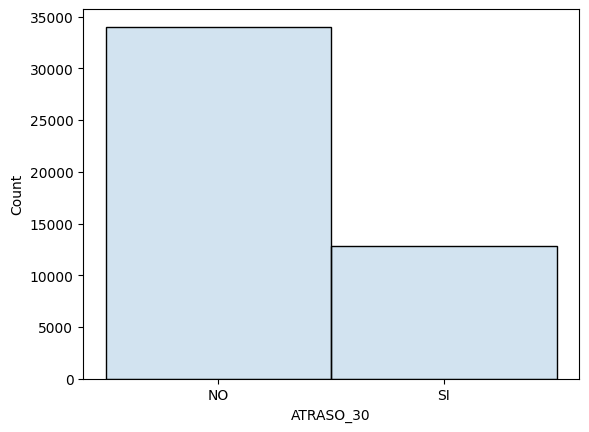

In [ ]:
sns.histplot(df['ATRASO_30'], bins=10, alpha=0.2)

**Relacion de atraso_30 con las variables**

** *texto en cursiva*Edad con atraso_30**


<Axes: xlabel='EDAD', ylabel='count'>

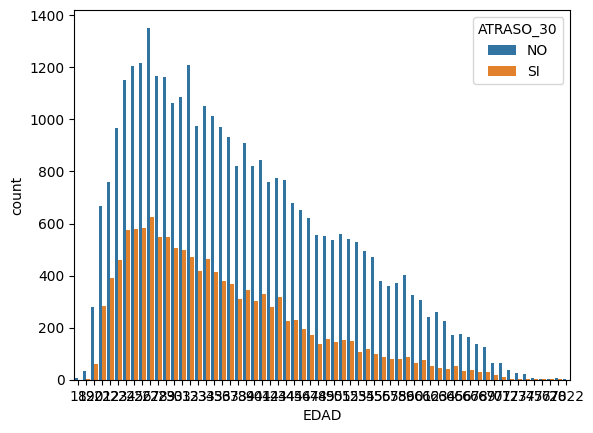

In [ ]:
sns.countplot(data=df, x='EDAD', hue='ATRASO_30')

**Transformaremos las edades en rangos**


In [ ]:
bins = list(range(20, 86, 5))
labels = [f'de {i} a {i+4}' for i in range(20, 85, 5)]
df['EDAD'] = pd.cut(df['EDAD'], bins=bins, labels=labels, right=False)

<Axes: xlabel='count', ylabel='EDAD'>

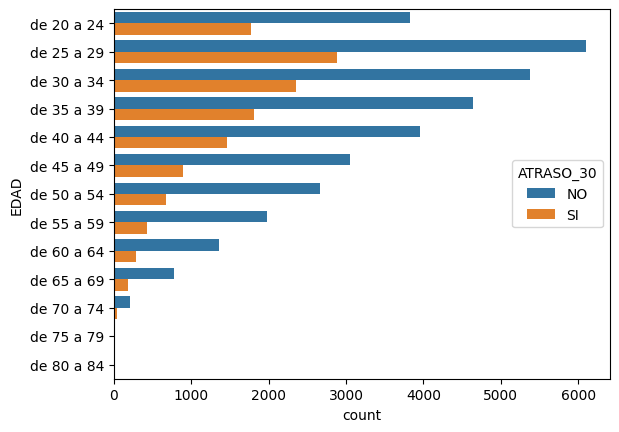

In [ ]:
sns.countplot(data=df, y='EDAD', hue='ATRASO_30')

**Relación sexo y atraso_30**

<Axes: xlabel='SEXO', ylabel='count'>

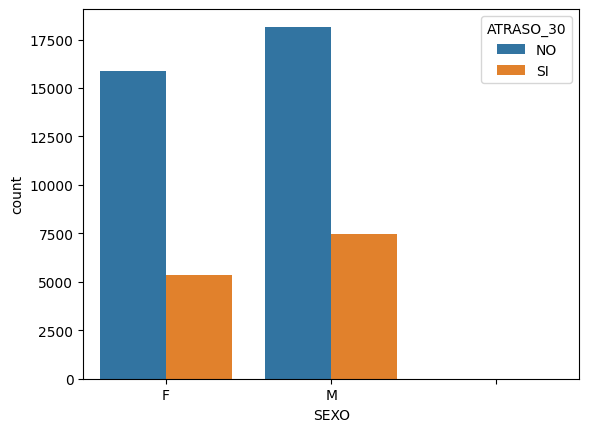

In [ ]:
sns.countplot(data=df, x="SEXO", hue=df['ATRASO_30'])

**Existe columnas con espacios, lo voy a definir como no definido**

<Axes: xlabel='SEXO', ylabel='count'>

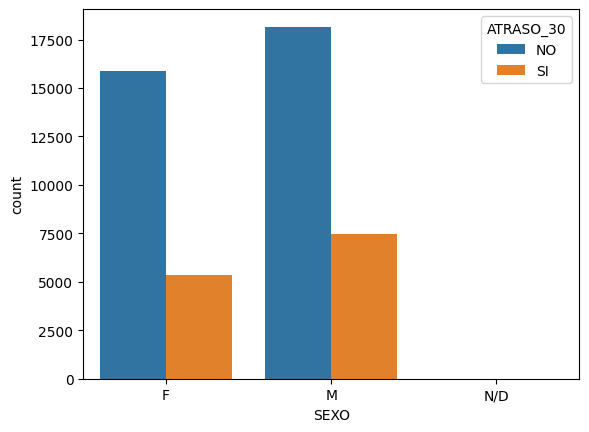

In [ ]:
df['SEXO'] = df['SEXO'].replace(' ', 'N/D')
sns.countplot(data=df, x="SEXO", hue=df['ATRASO_30'])

**Relación patente comercial y atraso_30**

<Axes: xlabel='PATENTE_COMERCIAL', ylabel='count'>

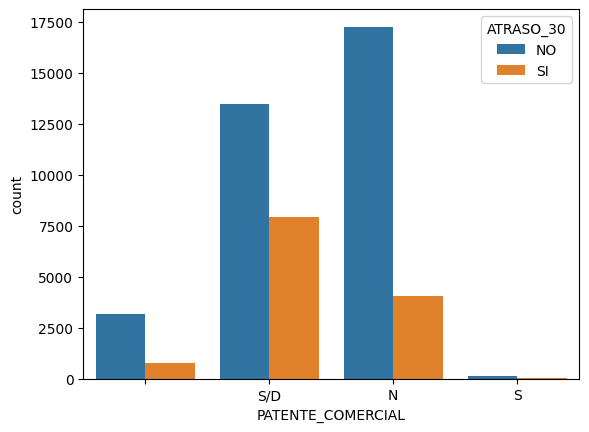

In [ ]:
sns.countplot(data=df, x="PATENTE_COMERCIAL", hue=df['ATRASO_30'])

**Existe columnas con espacios, lo voy a definir como S/D**

<Axes: xlabel='PATENTE_COMERCIAL', ylabel='count'>

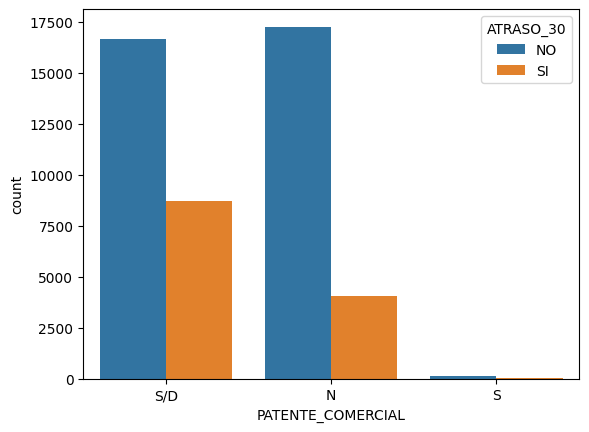

In [ ]:
df['PATENTE_COMERCIAL'] = df['PATENTE_COMERCIAL'].replace(' ', 'S/D')
sns.countplot(data=df, x="PATENTE_COMERCIAL", hue=df['ATRASO_30'])

**Relación tipo_operación y atraso_30**

<Axes: xlabel='count', ylabel='TIPO_OPERACION'>

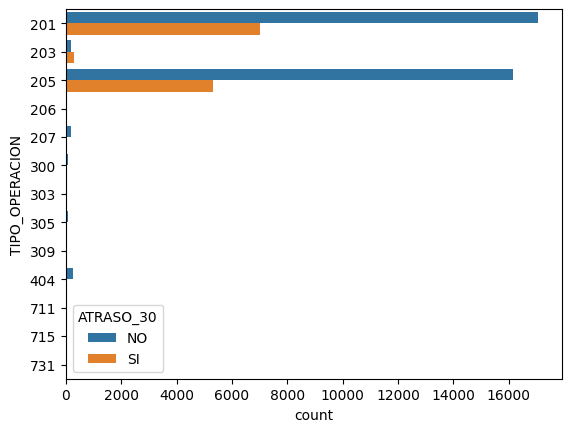

In [ ]:
sns.countplot(data=df, y="TIPO_OPERACION", hue=df['ATRASO_30'])

** Se borra tipo operacion por no aportar mucha información y ser redundante con otras columnas **

In [ ]:
df.drop('TIPO_OPERACION', axis=1, inplace=True)

**Relación entre tipo y atraso_30**

<Axes: xlabel='count', ylabel='TIPO'>

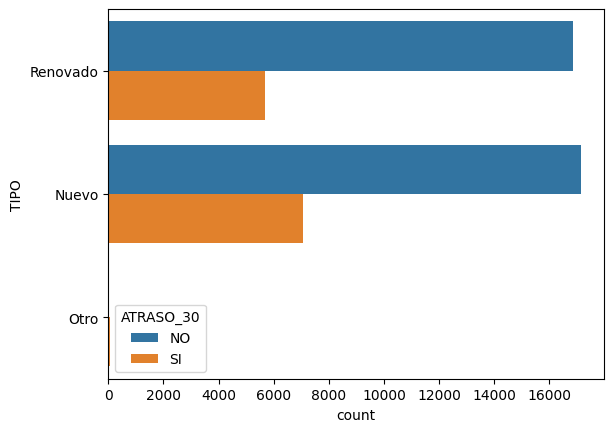

In [ ]:
sns.countplot(data=df, y="TIPO", hue=df['ATRASO_30'])

**Relación entre banca y atraso_30**

<Axes: xlabel='count', ylabel='BANCA'>

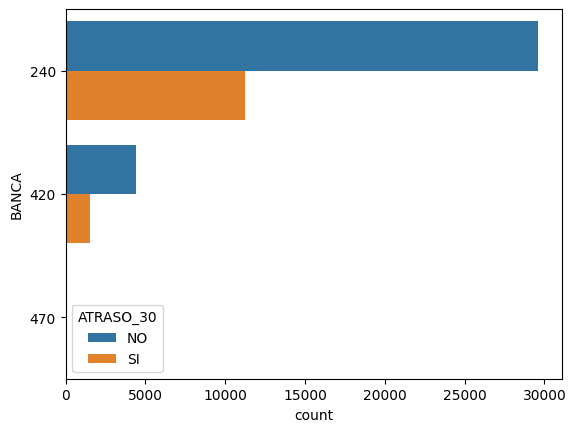

In [ ]:
sns.countplot(data=df, y="BANCA", hue=df['ATRASO_30'])

**Relación entre calificación y atraso_30**

<Axes: xlabel='count', ylabel='CALIFICACION'>

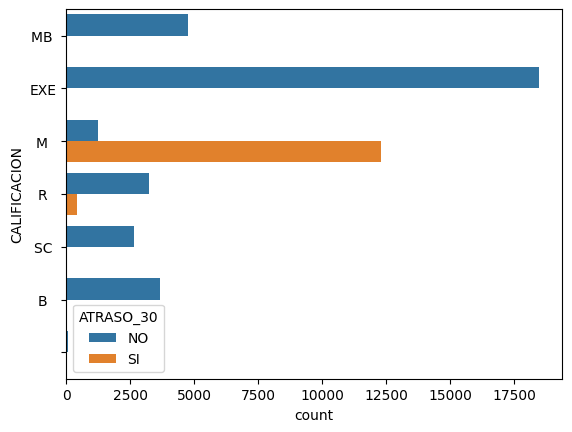

In [ ]:
sns.countplot(data=df, y="CALIFICACION", hue=df['ATRASO_30'])

**Relación entre medio y atraso_30**

<Axes: xlabel='count', ylabel='MEDIO'>

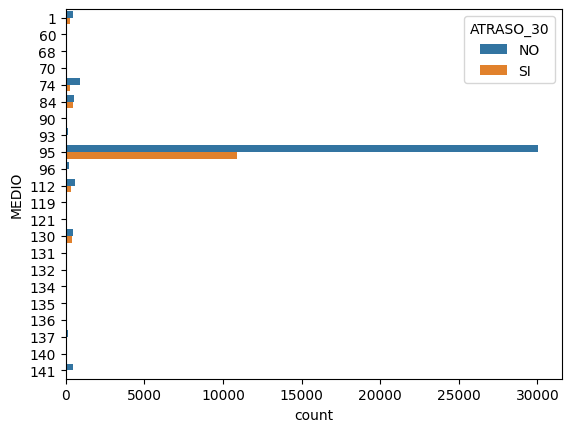

In [ ]:
sns.countplot(data=df, y="MEDIO", hue=df['ATRASO_30'])

**Se borra esta columna por no ofrecer mucha info sobre atraso**

In [ ]:
df.drop('MEDIO', axis=1, inplace=True)

**Relación entre canal y atraso_30**

<Axes: xlabel='count', ylabel='CANAL'>

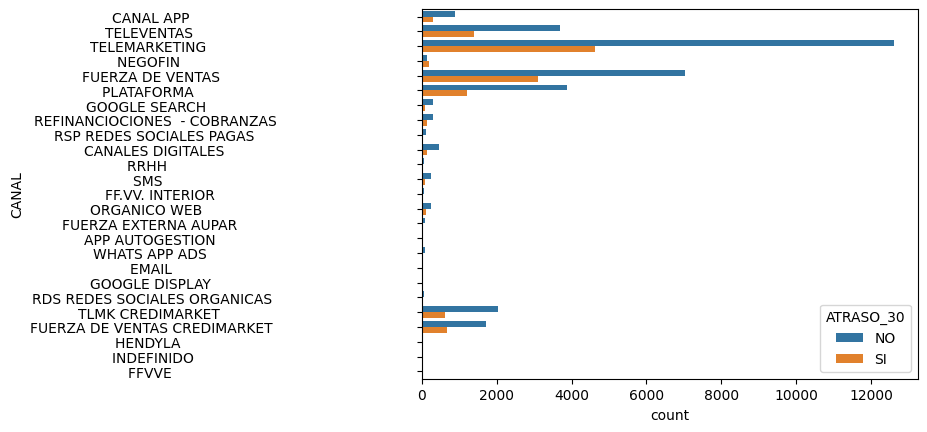

In [ ]:
sns.countplot(data=df, y="CANAL", hue=df['ATRASO_30'])

** Voy a analizar las cantidades de cada uno de los valores de canal **

In [ ]:
df['CANAL'] = df['CANAL'].str.strip()
df['CANAL'].value_counts()

TELEMARKETING                    17249
FUERZA DE VENTAS                 10123
PLATAFORMA                        5099
TELEVENTAS                        5061
TLMK CREDIMARKET                  2664
FUERZA DE VENTAS CREDIMARKET      2373
CANAL APP                         1175
CANALES DIGITALES                  610
REFINANCIOCIONES  - COBRANZAS      418
ORGANICO WEB                       374
GOOGLE SEARCH                      366
SMS                                325
NEGOFIN                            322
RSP REDES SOCIALES PAGAS           125
WHATS APP ADS                      103
FUERZA EXTERNA AUPAR               101
FF.VV. INTERIOR                     75
GOOGLE DISPLAY                      70
RRHH                                65
RDS REDES SOCIALES ORGANICAS        60
EMAIL                               23
INDEFINIDO                          13
APP AUTOGESTION                     12
HENDYLA                              8
FFVVE                                1
Name: CANAL, dtype: int64

** Voy a organizar canal en 4 categorias, televentas, fuerza de ventas, medios digitales y otros **

<Axes: xlabel='count', ylabel='CANAL'>

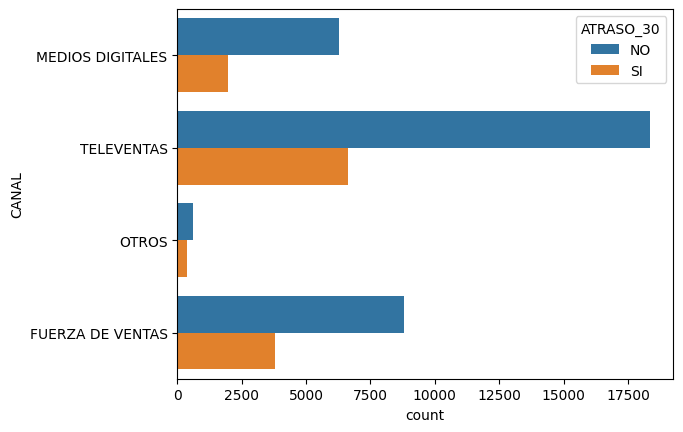

In [ ]:
def agrupar_canales(canal):
    if canal in ['TELEMARKETING', 'TELEVENTAS', 'TLMK CREDIMARKET']:
        return 'TELEVENTAS'
    elif canal in ['FUERZA DE VENTAS', 'FUERZA DE VENTAS CREDIMARKET', 'FUERZA EXTERNA AUPAR ', 'FF.VV. INTERIOR ', 'WHATS APP ADS']:
        return 'FUERZA DE VENTAS'
    elif canal in ['PLATAFORMA', 'CANAL APP', 'CANALES DIGITALES', 'ORGANICO WEB', 'GOOGLE SEARCH', 'SMS', 'RSP REDES SOCIALES PAGAS', 'GOOGLE DISPLAY', 'RDS REDES SOCIALES ORGANICAS', 'EMAIL', 'APP AUTOGESTION', 'HENDYLA']:
        return 'MEDIOS DIGITALES'
    else:
        return 'OTROS'
df['CANAL'] = df['CANAL'].apply(agrupar_canales)
sns.countplot(data=df, y="CANAL", hue=df['ATRASO_30'])

**Relación entre aprob_scoring y atraso_30**

<Axes: xlabel='count', ylabel='APROB_SCORING'>

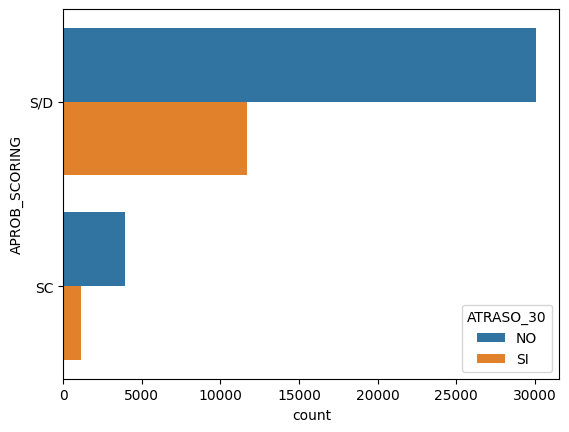

In [ ]:
sns.countplot(data=df, y="APROB_SCORING", hue=df['ATRASO_30'])

**Reemplazo S/D por No y SC por Si

<Axes: xlabel='count', ylabel='APROB_SCORING'>

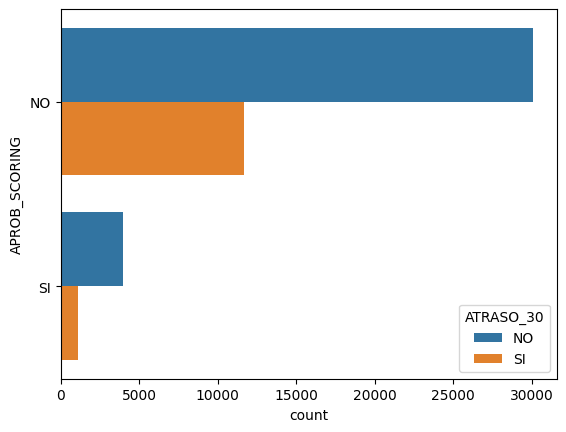

In [ ]:
df['APROB_SCORING'] = df['APROB_SCORING'].replace('S/D', 'NO')
df['APROB_SCORING'] = df['APROB_SCORING'].replace('SC', 'SI')
sns.countplot(data=df, y="APROB_SCORING", hue=df['ATRASO_30'])

**Relación entre aprob_linea y atraso_30**

<Axes: xlabel='count', ylabel='APROB_LINEA'>

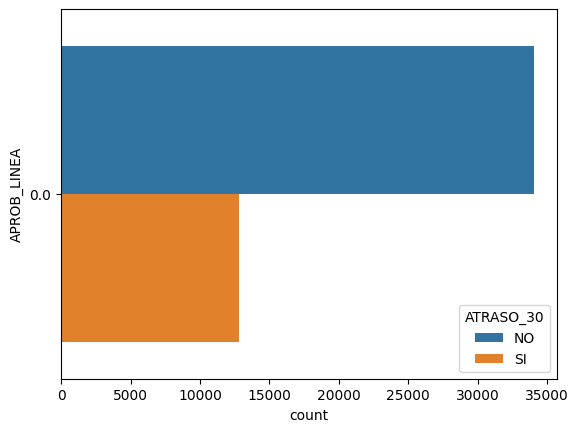

In [ ]:
sns.countplot(data=df, y="APROB_LINEA", hue=df['ATRASO_30'])

**Se borra esta columna por no aportar datos significantes**

In [ ]:
df.drop('APROB_LINEA', axis=1, inplace=True)

**Relación entre monto_desembolso y atraso_30**

<Axes: xlabel='ATRASO_30', ylabel='MONTO_DESEMBOLSO'>

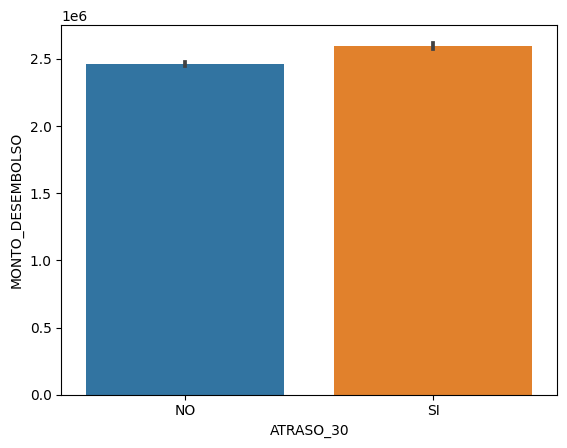

In [ ]:
sns.barplot(data=df, y="MONTO_DESEMBOLSO", x=df['ATRASO_30'], estimator=np.mean)

**Relación entre monto_liquido y atraso_30**

<Axes: xlabel='ATRASO_30', ylabel='MONTO_LIQUIDO'>

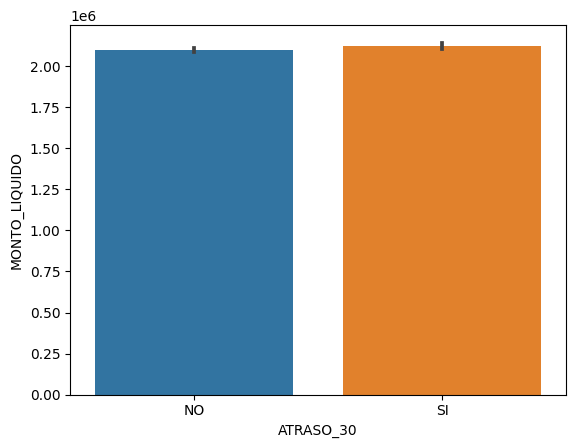

In [ ]:
sns.barplot(data=df, y="MONTO_LIQUIDO", x=df['ATRASO_30'], estimator=np.mean)



```
# E`sto tiene formato de código`
```

** Se borra columna por no servir para discriminar bien quien se va a atrasar y quien no **


In [ ]:
df.drop('MONTO_LIQUIDO', axis=1, inplace=True)

**Relación entre monto_cuota y atraso_30**

<Axes: xlabel='ATRASO_30', ylabel='MONTO_CUOTA'>

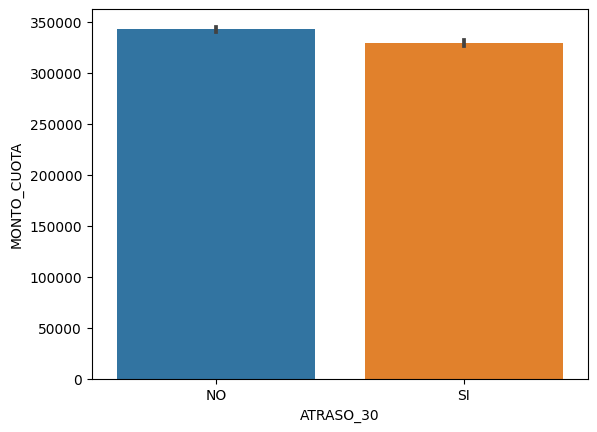

In [ ]:
sns.barplot(data=df, y="MONTO_CUOTA", x=df['ATRASO_30'], estimator=np.mean)

**Relación entre cuotas_total y atraso_30**

<Axes: xlabel='ATRASO_30', ylabel='CUOTAS_TOTAL'>

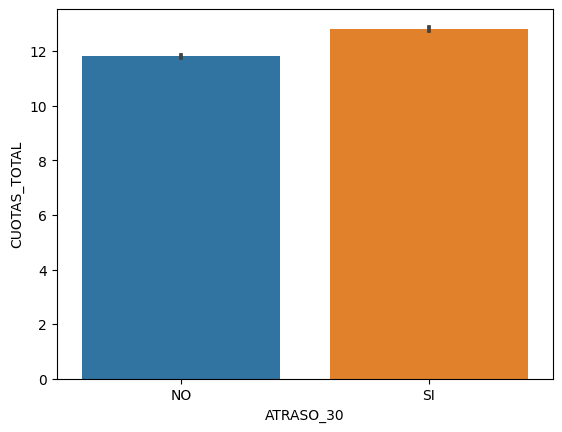

In [ ]:
sns.barplot(data=df, y="CUOTAS_TOTAL", x=df['ATRASO_30'], estimator=np.mean)

**Relación entre cuotas_pendientes y atraso_30**

<Axes: xlabel='ATRASO_30', ylabel='CUOTAS_PENDIENTE'>

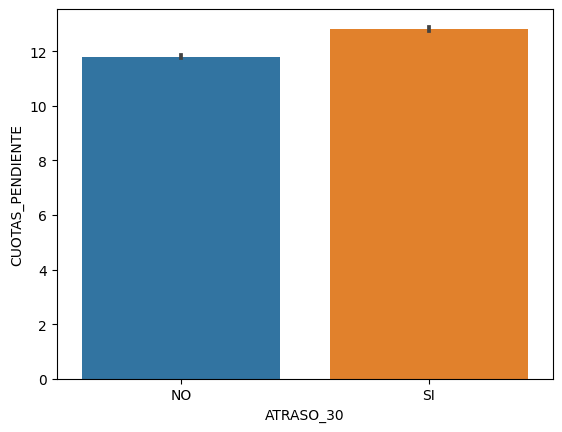

In [ ]:
sns.barplot(data=df, y="CUOTAS_PENDIENTE", x=df['ATRASO_30'], estimator=np.mean)

**Relación entre estado y atraso_30**

<Axes: xlabel='count', ylabel='ESTADO'>

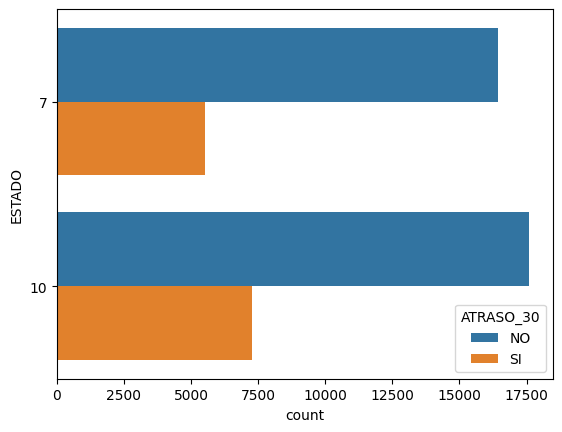

In [ ]:
sns.countplot(data=df, y="ESTADO", hue=df['ATRASO_30'])

**Relación entre tasa y atraso_30**

<Axes: xlabel='ATRASO_30', ylabel='TASA'>

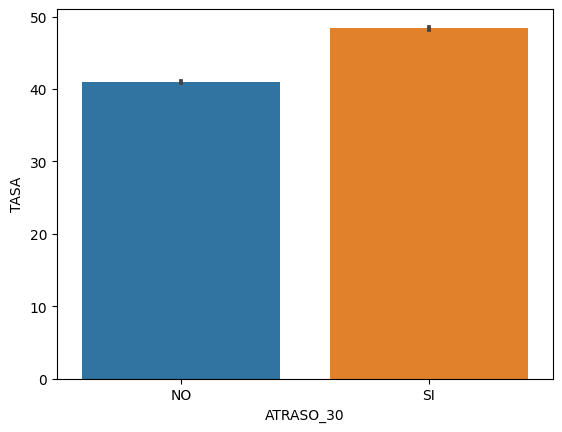

In [ ]:
sns.barplot(data=df, y="TASA", x=df['ATRASO_30'], estimator=np.mean)

**Relación entre score_bicsa y atraso_30**

<Axes: xlabel='ATRASO_30', ylabel='SCORE_BICSA'>

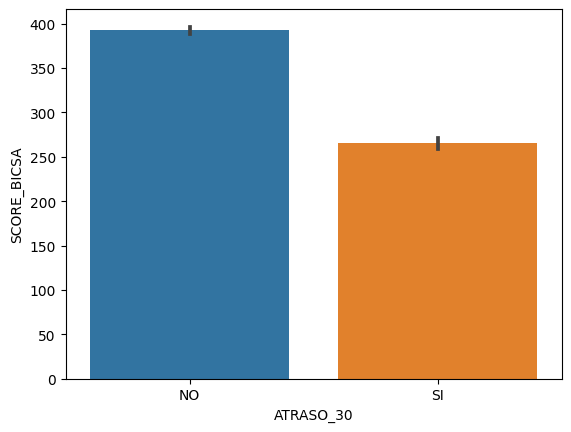

In [ ]:
sns.barplot(data=df, y="SCORE_BICSA", x=df['ATRASO_30'], estimator=np.mean)

**Relación entre tipo_aprobación y atraso_30**

<Axes: xlabel='count', ylabel='TIPO_APROBACION'>

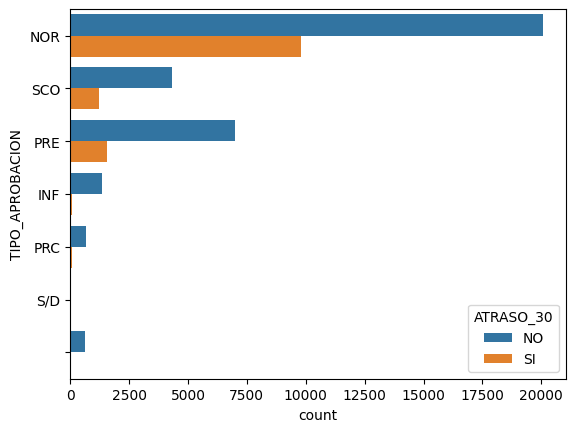

In [ ]:
sns.countplot(data=df, y="TIPO_APROBACION", hue=df['ATRASO_30'])

**Relación entre tramo y atraso_30**

<Axes: xlabel='count', ylabel='TRAMO'>

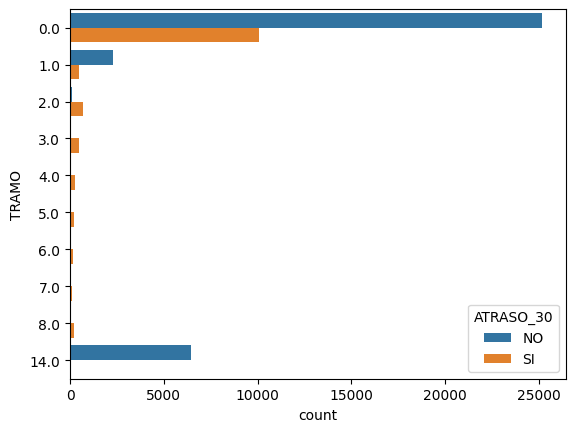

In [ ]:
sns.countplot(data=df, y="TRAMO", hue=df['ATRASO_30'])

**AGRUPARE EN 2 GRUPOS DE 0 A 5 Y DE 6 A 14**


<Axes: xlabel='count', ylabel='TRAMO'>

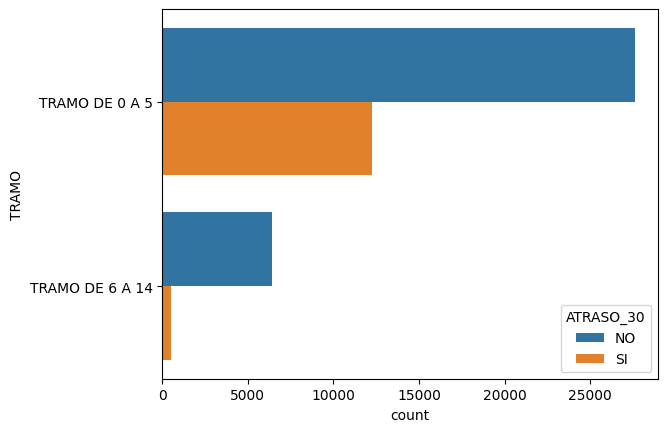

In [ ]:
def agrupar_tramo(tramo):
    if tramo >=0.0 and tramo <=5.0:
        return 'TRAMO DE 0 A 5'
    else:
        return 'TRAMO DE 6 A 14'
df['TRAMO'] = df['TRAMO'].apply(agrupar_tramo)
sns.countplot(data=df, y="TRAMO", hue=df['ATRASO_30'])

**Relación entre cantidad de gestiones y atraso_30**

<Axes: xlabel='ATRASO_30', ylabel='CANT_GESTIONES'>

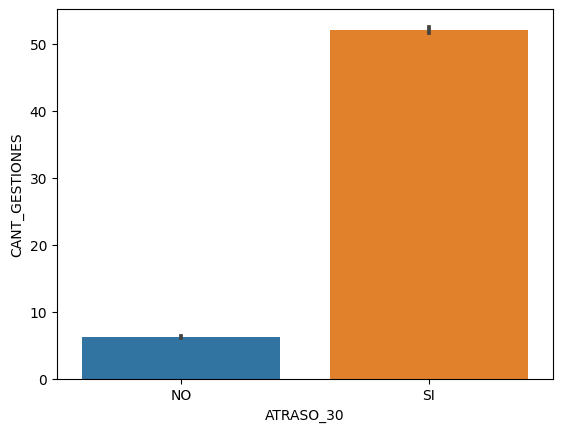

In [ ]:
sns.barplot(data=df, y="CANT_GESTIONES", x=df['ATRASO_30'], estimator=np.mean)

**Relación entre cantopemarca y atraso_30**

<Axes: xlabel='ATRASO_30', ylabel='CANTOPEMARCA'>

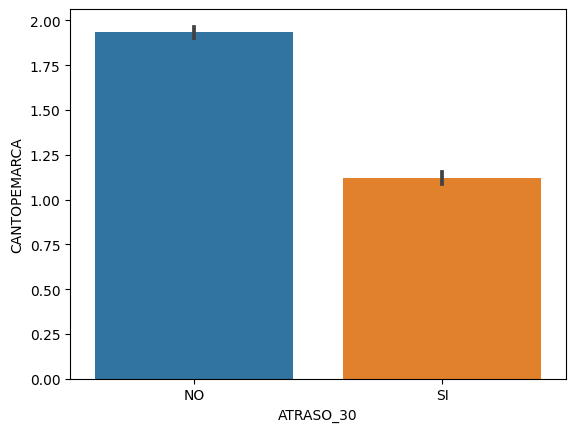

In [ ]:
sns.barplot(data=df, y="CANTOPEMARCA", x=df['ATRASO_30'], estimator=np.mean)

**Relación entre cantopeotramarca y atraso_30**

<Axes: xlabel='ATRASO_30', ylabel='CANTOPEOTRAMARCA'>

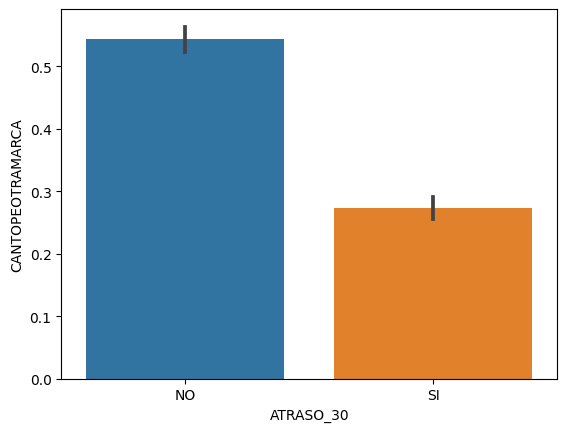

In [ ]:
sns.barplot(data=df, y="CANTOPEOTRAMARCA", x=df['ATRASO_30'], estimator=np.mean)

**Relación entre estado_civil y atraso_30**

<Axes: xlabel='count', ylabel='ESTADO_CIVIL'>

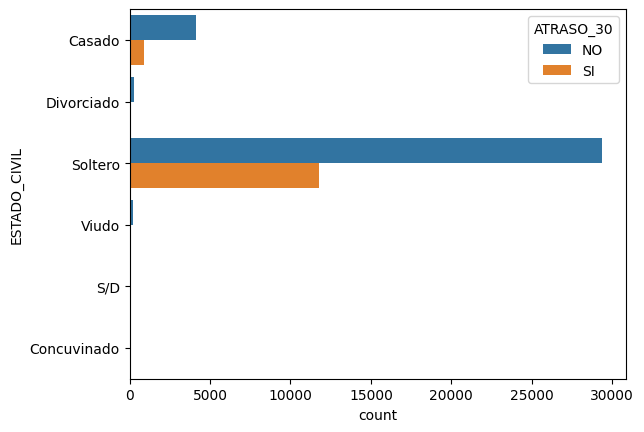

In [ ]:
sns.countplot(data=df, y="ESTADO_CIVIL", hue=df['ATRASO_30'])

**Relación entre ingreso y atraso_30**

<Axes: xlabel='ATRASO_30', ylabel='INGRESO'>

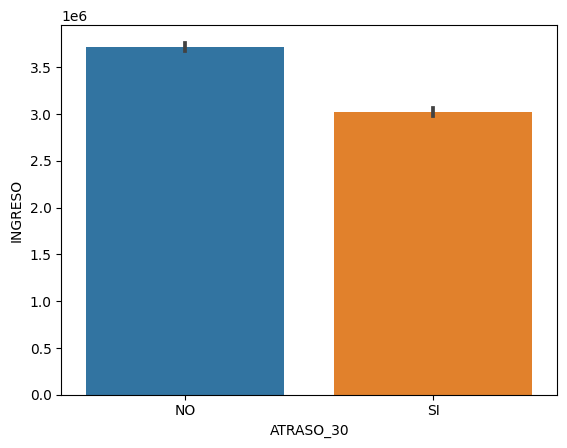

In [ ]:
sns.barplot(data=df, y="INGRESO", x=df['ATRASO_30'], estimator=np.mean)

**Relación entre cuotas_canceladas y atraso_30**


<Axes: xlabel='ATRASO_30', ylabel='CUOTAS_CANCELADAS'>

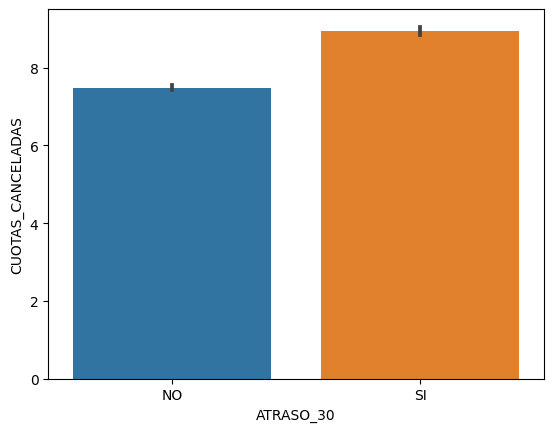

In [ ]:
sns.barplot(data=df, y="CUOTAS_CANCELADAS", x=df['ATRASO_30'], estimator=np.mean)

**Relación entre aporta_ips y atraso_30**

<Axes: xlabel='count', ylabel='APORTA_IPS'>

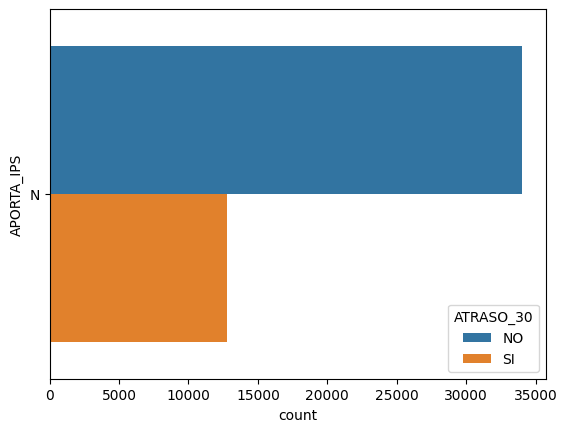

In [ ]:
sns.countplot(data=df, y="APORTA_IPS", hue=df['ATRASO_30'])

** COMO SON INFORMALES NO TIENEN IPS, BORRAR COLUMNA **


In [ ]:
df.drop('APORTA_IPS', axis=1, inplace=True)

**Relación entre tipo_entidad y atraso_30**

<Axes: xlabel='count', ylabel='TIPO_ENTIDAD'>

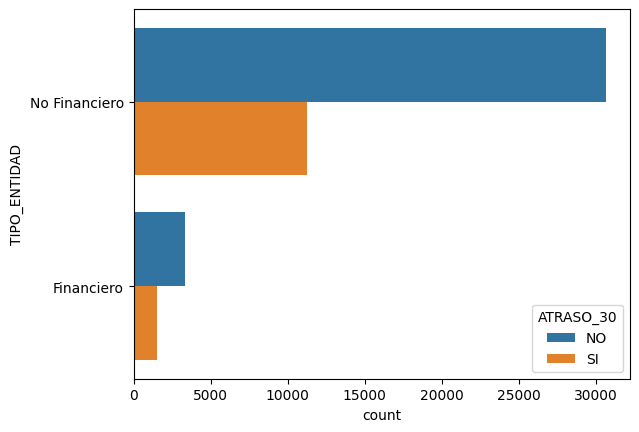

In [ ]:
sns.countplot(data=df, y="TIPO_ENTIDAD", hue=df['ATRASO_30'])

**Relación entre tipo_cliente y atraso_30**

<Axes: xlabel='count', ylabel='TIPO_CLIENTE'>

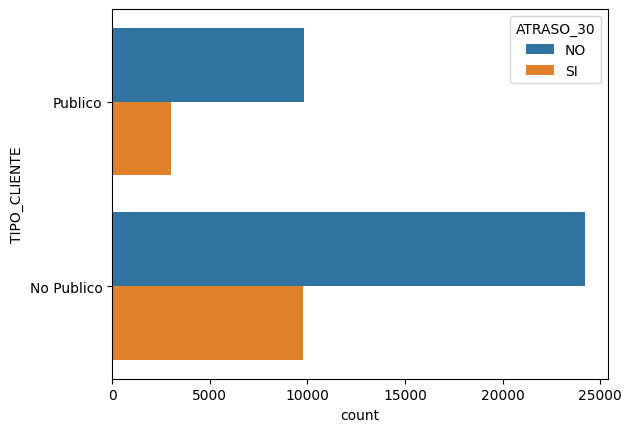

In [ ]:
sns.countplot(data=df, y="TIPO_CLIENTE", hue=df['ATRASO_30'])

**Relación entre aporta_iva y atraso_30**

<Axes: xlabel='count', ylabel='APORTA_IVA'>

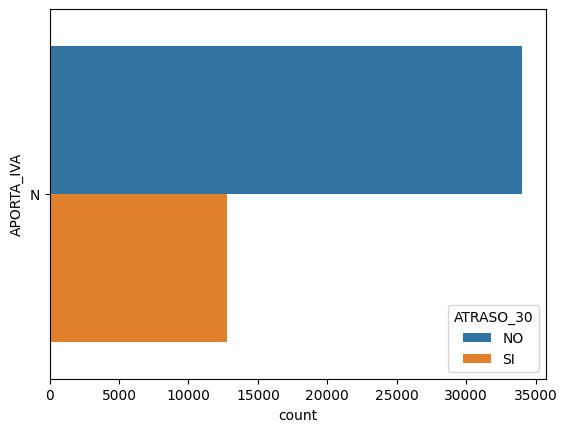

In [ ]:
sns.countplot(data=df, y="APORTA_IVA", hue=df['ATRASO_30'])

** Borrar columna aporta_iva **



In [ ]:
df.drop('APORTA_IVA', axis=1, inplace=True)

**Relación entre marca_preaprobado y atraso_30**

<Axes: xlabel='count', ylabel='MARCA_PREAPROBADO'>

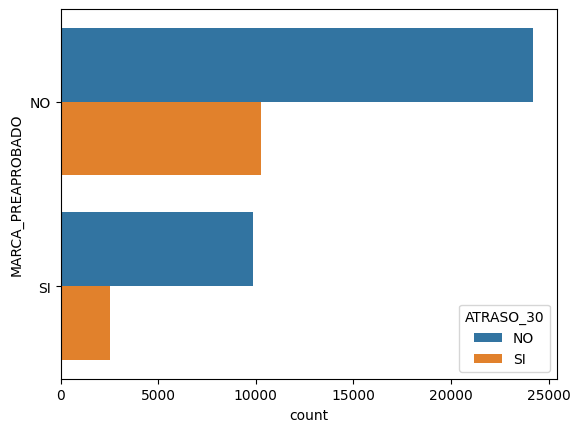

In [ ]:
sns.countplot(data=df, y="MARCA_PREAPROBADO", hue=df['ATRASO_30'])

**Relación entre tipo_aprob_robot y atraso_30**

<Axes: xlabel='count', ylabel='TIPO_APROB_ROBOT'>

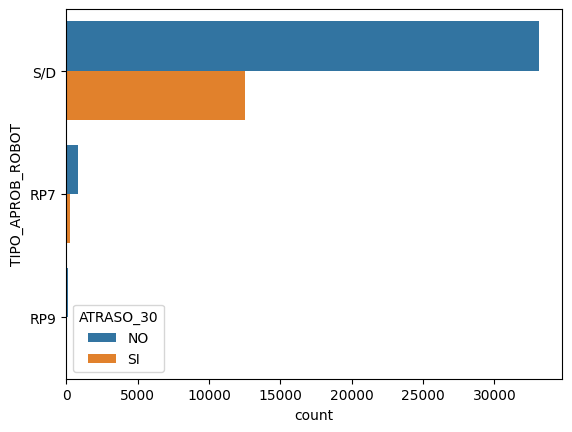

In [ ]:
sns.countplot(data=df, y="TIPO_APROB_ROBOT", hue=df['ATRASO_30'])

**Relación entre ingreso_simplificado y atraso_30**

<Axes: xlabel='count', ylabel='INGRESO_SIMPLIFICADO'>

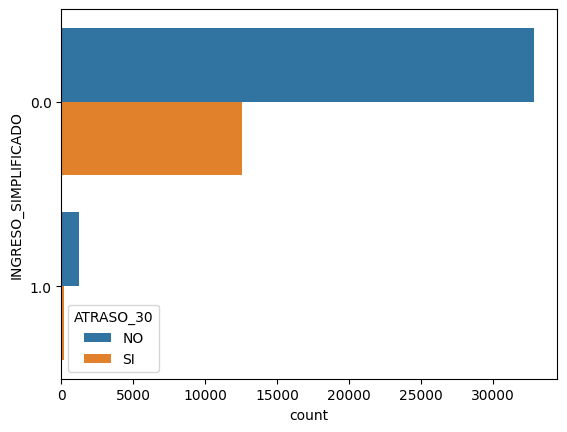

In [ ]:
sns.countplot(data=df, y="INGRESO_SIMPLIFICADO", hue=df['ATRASO_30'])

**Relación entre faja y atraso_30**

<Axes: xlabel='count', ylabel='FAJA'>

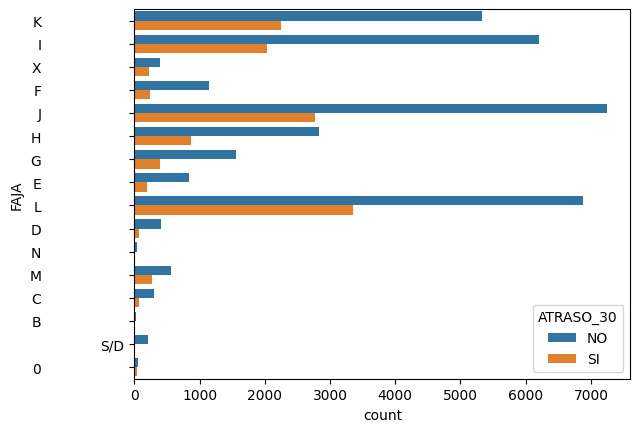

In [ ]:
sns.countplot(data=df, y="FAJA", hue=df['ATRASO_30'])

**LA SIGUIENTE COLUMNA ES FECHA_INGRESO_LABORAL PERO LO VAMOS A TRANSFORMAR EN ANTIGUEDAD PARA PODER TRABAJAR POR EL MISMO**

In [ ]:
df['FECHA_INGRESO_LABORAL'] = pd.to_datetime(df['FECHA_INGRESO_LABORAL'], errors='coerce')

In [ ]:
df['ANTIGUEDAD'] = (datetime.now() - df['FECHA_INGRESO_LABORAL']).dt.days / 365.25

In [ ]:
df['ANTIGUEDAD'] = df['ANTIGUEDAD'].fillna(0).astype(int)

In [ ]:
df.drop(columns='FECHA_INGRESO_LABORAL', axis=1, inplace=True)

**Relación entre antiguedad y atraso_30**

<Axes: xlabel='ATRASO_30', ylabel='ANTIGUEDAD'>

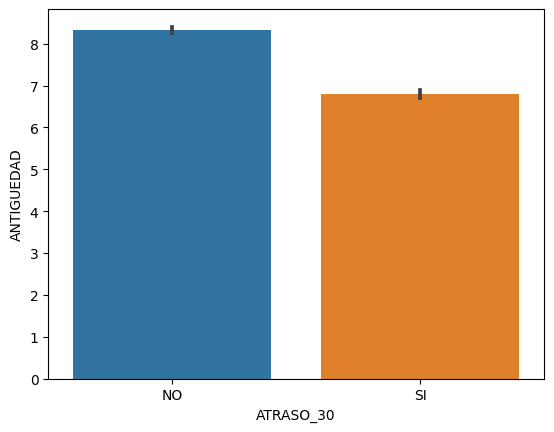

In [ ]:
sns.barplot(data=df, y="ANTIGUEDAD", x=df['ATRASO_30'], estimator=np.mean)

**Relación entre excep_desembolso y atraso_30**

<Axes: xlabel='count', ylabel='EXCEP_DESEMBOLSO'>

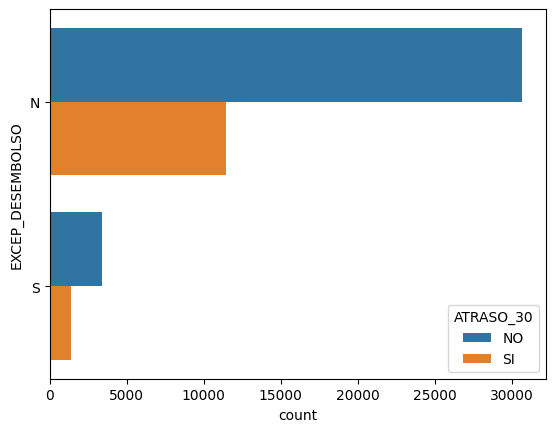

In [ ]:
sns.countplot(data=df, y="EXCEP_DESEMBOLSO", hue=df['ATRASO_30'])

<Axes: xlabel='count', ylabel='EXCEP_REP_APROB'>

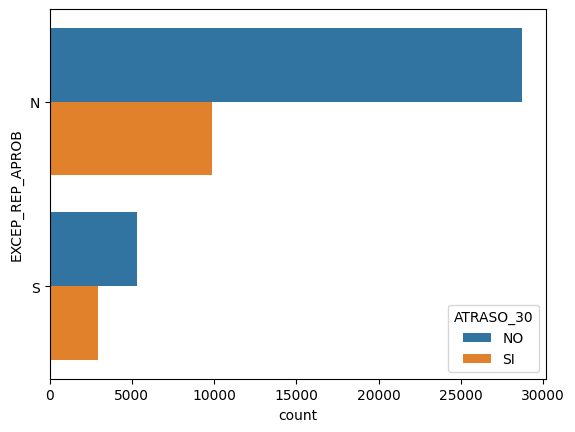

In [ ]:
sns.countplot(data=df, y="EXCEP_REP_APROB", hue=df['ATRASO_30'])

<Axes: xlabel='count', ylabel='EXCEP_PROCESO'>

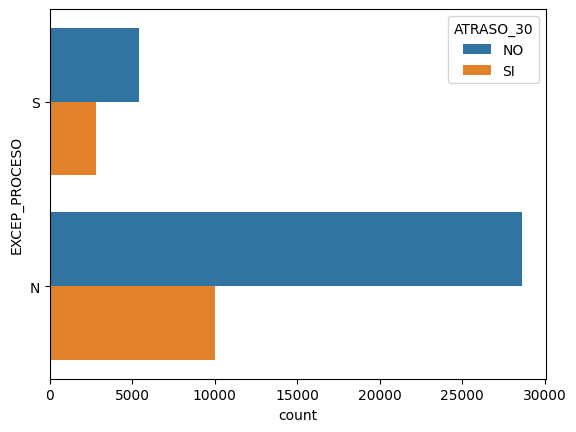

In [ ]:
sns.countplot(data=df, y="EXCEP_PROCESO", hue=df['ATRASO_30'])

<Axes: xlabel='count', ylabel='TIPO_PROCESO'>

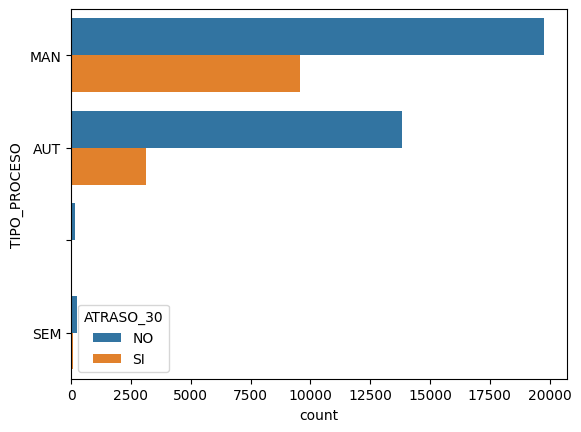

In [ ]:
sns.countplot(data=df, y="TIPO_PROCESO", hue=df['ATRASO_30'])

**Voy a reemplazar el dato ' ' por otros**

<Axes: xlabel='count', ylabel='TIPO_PROCESO'>

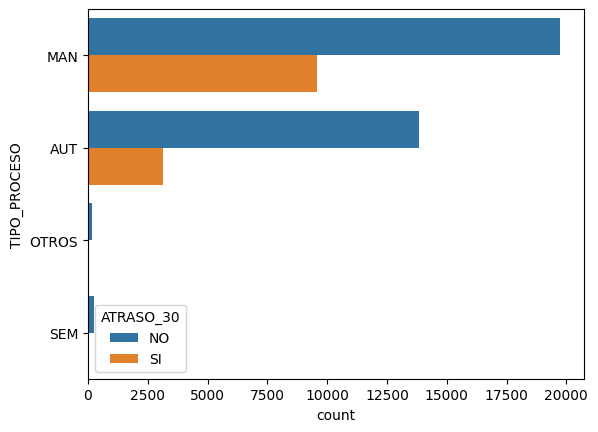

In [ ]:
df['TIPO_PROCESO'] = df['TIPO_PROCESO'].replace('   ', 'OTROS')
sns.countplot(data=df, y="TIPO_PROCESO", hue=df['ATRASO_30'])

<Axes: xlabel='count', ylabel='VIA_INGRESO'>

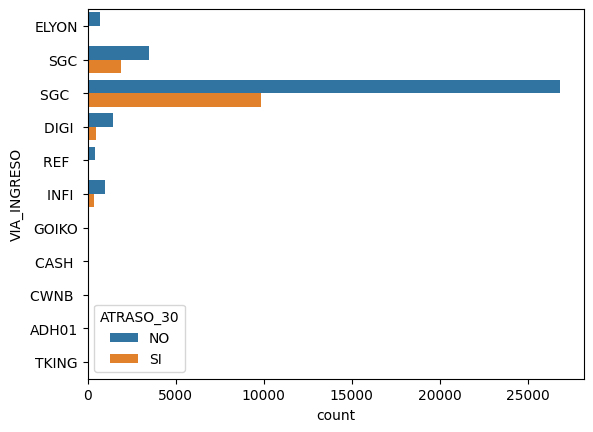

In [ ]:
sns.countplot(data=df, y="VIA_INGRESO", hue=df['ATRASO_30'])

**Agrupare en 2 grupos, sgc y otros**

<Axes: xlabel='count', ylabel='VIA_INGRESO'>

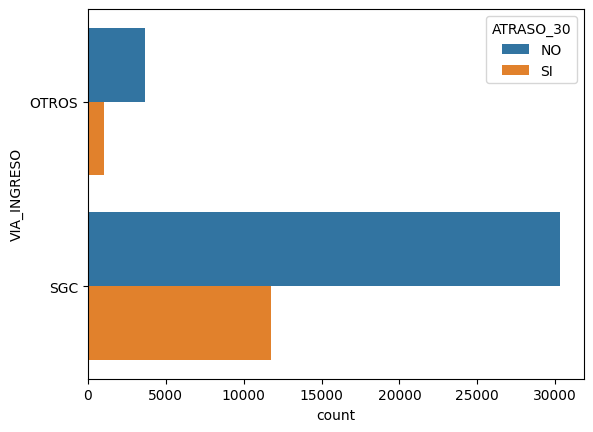

In [ ]:

df['VIA_INGRESO'] = df['VIA_INGRESO'].str.strip()
def agrupar_via_ingreso(via_ingreso):
    if via_ingreso in ['SGC']:
        return 'SGC'
    else:
        return 'OTROS'
df['VIA_INGRESO'] = df['VIA_INGRESO'].apply(agrupar_via_ingreso)
sns.countplot(data=df, y="VIA_INGRESO", hue=df['ATRASO_30'])

<Axes: xlabel='ATRASO_30', ylabel='INGRESO_CLIENTE_DESEMBOLSO'>

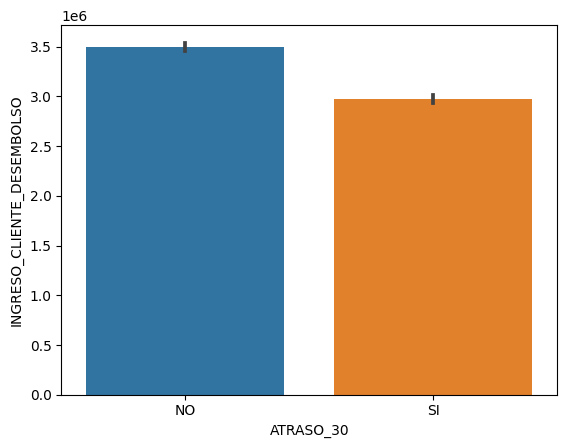

In [ ]:
sns.barplot(data=df, y="INGRESO_CLIENTE_DESEMBOLSO", x=df['ATRASO_30'], estimator=np.mean)

<Axes: xlabel='count', ylabel='RECHAZO_CARGA'>

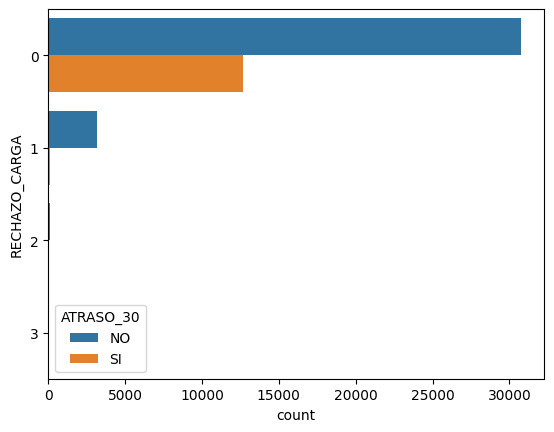

In [ ]:
sns.countplot(data=df, y="RECHAZO_CARGA", hue=df['ATRASO_30'])

**Voy a transformar rechazo carga si tuvo 0 entonces No, o si tuvo 1 o mas que sea si**

<Axes: xlabel='count', ylabel='RECHAZO_CARGA'>

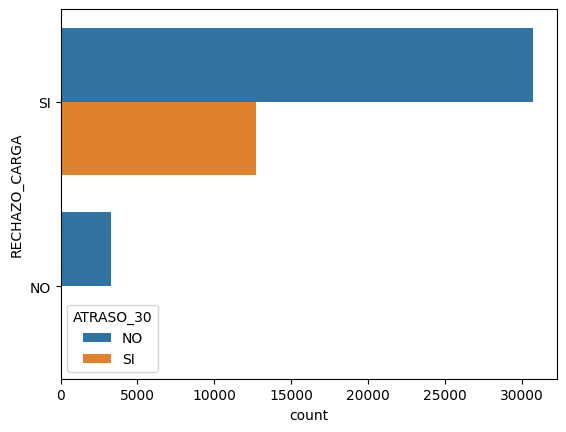

In [ ]:
def agrupar_rechazo(rechazo):
    if rechazo == 0:
        return 'SI'
    else:
        return 'NO'
df['RECHAZO_CARGA'] = df['RECHAZO_CARGA'].apply(agrupar_rechazo)
sns.countplot(data=df, y="RECHAZO_CARGA", hue=df['ATRASO_30'])

<Axes: xlabel='count', ylabel='TIPO_COBRO'>

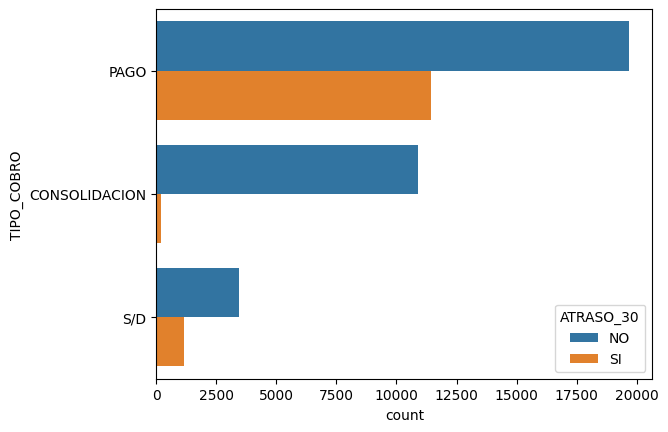

In [ ]:
sns.countplot(data=df, y="TIPO_COBRO", hue=df['ATRASO_30'])

<Axes: xlabel='count', ylabel='HABILITA_BNF_LAB'>

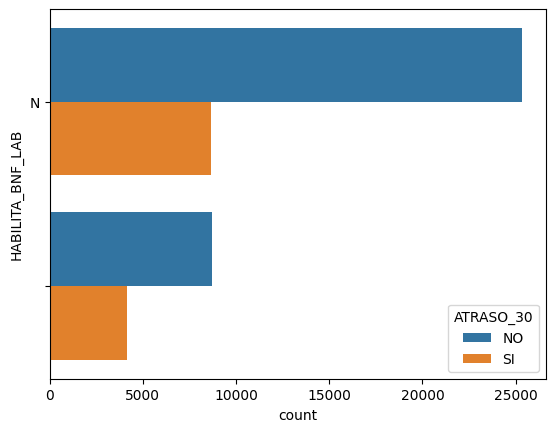

In [ ]:
sns.countplot(data=df, y="HABILITA_BNF_LAB", hue=df['ATRASO_30'])

<Axes: xlabel='count', ylabel='HABILITA_BNF_LAB'>

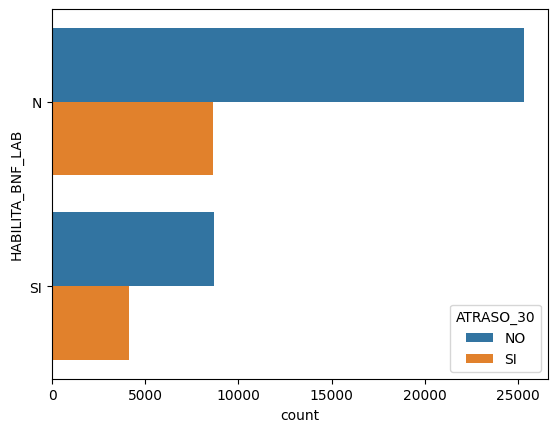

In [ ]:
df['HABILITA_BNF_LAB'] = df['HABILITA_BNF_LAB'].replace(' ', 'SI')
sns.countplot(data=df, y="HABILITA_BNF_LAB", hue=df['ATRASO_30'])

<Axes: xlabel='count', ylabel='CIUDAD_PARTICULAR'>

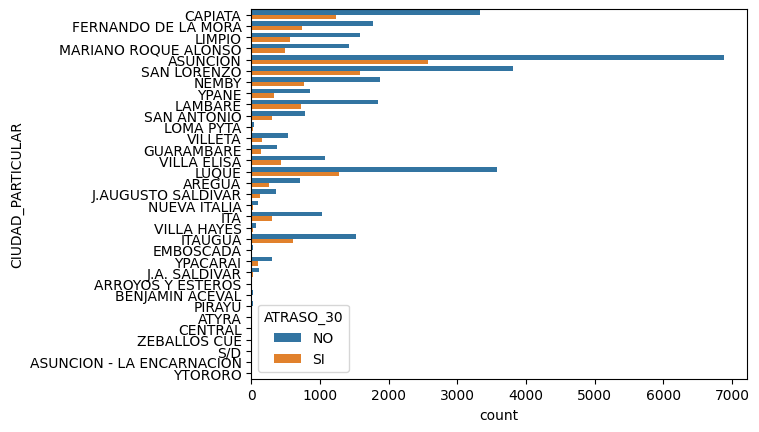

In [ ]:
df['CIUDAD_PARTICULAR'] = df['CIUDAD_PARTICULAR'].str.strip()
sns.countplot(df, y="CIUDAD_PARTICULAR", hue=df['ATRASO_30'])

In [ ]:
df['CIUDAD_PARTICULAR'].value_counts()

ASUNCION                     9450
SAN LORENZO                  5385
LUQUE                        4857
CAPIATA                      4550
ÑEMBY                        2647
LAMBARE                      2572
FERNANDO DE LA MORA          2509
LIMPIO                       2139
ITAUGUA                      2123
MARIANO ROQUE ALONSO         1911
VILLA ELISA                  1500
ITA                          1323
YPANE                        1186
SAN ANTONIO                  1081
AREGUA                        965
VILLETA                       691
GUARAMBARE                    515
J.AUGUSTO SALDIVAR            479
YPACARAI                      401
J.A. SALDIVAR                 140
NUEVA ITALIA                  133
VILLA HAYES                    87
LOMA PYTA                      59
EMBOSCADA                      28
BENJAMIN ACEVAL                24
PIRAYU                         23
S/D                            18
ZEBALLOS CUE                    8
ATYRA                           4
CENTRAL       

**Agrupare ciudad_particular en 4, norte, sur, este, oeste**

<Axes: xlabel='count', ylabel='CIUDAD_PARTICULAR'>

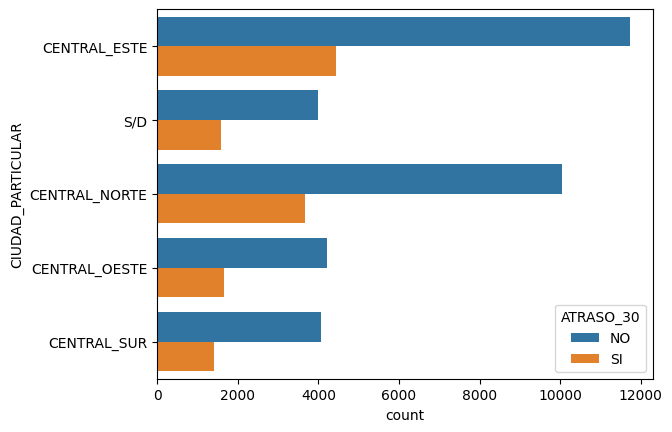

In [ ]:
central_norte = ['LIMPIO', 'MARIANO ROQUE ALONSO', 'ASUNCION', 'ASUNCION - LA ENCARNACION', 'ARROYOS Y ESTEROS', 'LOMA PYTA', 'EMBOSCADA', 'BENJAMIN ACEVAL', 'ZEBALLOS CUE', 'VILLA HAYES']
central_sur = ['ITAUGUA', 'ITA', 'VILLETA', 'YPANE', 'NUEVA ITALIA', 'PIRAYU']
central_este = ['LUQUE', 'CAPIATA', 'AREGUA', 'YPACARAI', 'SAN LORENZO', 'ATYRA']
central_oeste = ['VILLA ELISA', 'SAN ANTONIO', 'ÑEMBY', 'GUARAMBARE', 'J.A. SALDIVAR', 'YTORORO ']
def agrupar_ciudades(ciudad):
    if ciudad in central_norte:
        return 'CENTRAL_NORTE'
    elif ciudad in central_sur:
        return 'CENTRAL_SUR'
    elif ciudad in central_este:
        return 'CENTRAL_ESTE'
    elif ciudad in central_oeste:
        return 'CENTRAL_OESTE'
    else:
        return 'S/D'
df['CIUDAD_PARTICULAR'] = df['CIUDAD_PARTICULAR'].apply(agrupar_ciudades)
sns.countplot(data=df, y="CIUDAD_PARTICULAR", hue=df['ATRASO_30'])

Por ultimo borro ciudad_laboral

In [ ]:
df.drop('CIUDAD_LABORAL', axis=1, inplace=True)

In [ ]:
df.columns

Index(['EDAD', 'SEXO', 'PATENTE_COMERCIAL', 'TIPO', 'BANCA', 'CALIFICACION',
       'CANAL', 'APROB_SCORING', 'MONTO_DESEMBOLSO', 'MONTO_CUOTA',
       'CUOTAS_TOTAL', 'CUOTAS_PENDIENTE', 'ESTADO', 'TASA', 'SCORE_BICSA',
       'TIPO_APROBACION', 'MAX_ATRASO', 'CANT_EXCEPCIONES',
       'CANT_CONDICIONADOS', 'OPE_NUEVA', 'TRAMO', 'CANT_GESTIONES',
       'CANTOPEMARCA', 'CANTOPEOTRAMARCA', 'ESTADO_CIVIL', 'INGRESO',
       'CUOTAS_CANCELADAS', 'TIPO_ENTIDAD', 'TIPO_CLIENTE',
       'MARCA_PREAPROBADO', 'TIPO_APROB_ROBOT', 'INGRESO_SIMPLIFICADO', 'FAJA',
       'EXCEP_DESEMBOLSO', 'EXCEP_REP_APROB', 'EXCEP_PROCESO', 'TIPO_PROCESO',
       'VIA_INGRESO', 'INGRESO_CLIENTE_DESEMBOLSO', 'RECHAZO_CARGA',
       'TIPO_COBRO', 'HABILITA_BNF_LAB', 'CIUDAD_PARTICULAR', 'ATRASO_30',
       'ANTIGUEDAD'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46815 entries, 0 to 46814
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   EDAD                        46767 non-null  category
 1   SEXO                        46815 non-null  object  
 2   PATENTE_COMERCIAL           46815 non-null  object  
 3   TIPO                        46815 non-null  object  
 4   BANCA                       46815 non-null  int64   
 5   CALIFICACION                46815 non-null  object  
 6   CANAL                       46815 non-null  object  
 7   APROB_SCORING               46815 non-null  object  
 8   MONTO_DESEMBOLSO            46815 non-null  float64 
 9   MONTO_CUOTA                 46815 non-null  float64 
 10  CUOTAS_TOTAL                46815 non-null  int64   
 11  CUOTAS_PENDIENTE            46815 non-null  int64   
 12  ESTADO                      46815 non-null  int64   
 13  TASA            

**Se borra las columnas MAX_ATRASO y CANT_GESTIONES**

In [ ]:
df.drop('MAX_ATRASO', axis=1, inplace=True)
df.drop('CANT_GESTIONES', axis=1, inplace=True)

# **Preprocesado de los datos**

In [ ]:
import sklearn.preprocessing as pre

In [ ]:
variables_categoricas= ['EDAD', 'SEXO', 'PATENTE_COMERCIAL', 'TIPO', 'BANCA', 'CALIFICACION', 'APROB_SCORING', 'ESTADO', 'SCORE_BICSA', 'TIPO_APROBACION', 'TRAMO', 'ESTADO_CIVIL', 'TIPO_ENTIDAD', 'TIPO_CLIENTE', 'MARCA_PREAPROBADO', 'TIPO_APROB_ROBOT', 'INGRESO_SIMPLIFICADO', 'FAJA', 'EXCEP_DESEMBOLSO', 'EXCEP_REP_APROB', 'EXCEP_PROCESO', 'TIPO_PROCESO', 'VIA_INGRESO', 'RECHAZO_CARGA', 'HABILITA_BNF_LAB', 'TIPO_COBRO', 'ATRASO_30']
variables_onehot = ['CANAL', 'CIUDAD_PARTICULAR']
variables_numericas = ['MONTO_DESEMBOLSO', 'MONTO_CUOTA', 'CUOTAS_TOTAL', 'CUOTAS_PENDIENTE', 'TASA', 'CANT_EXCEPCIONES', 'CANT_CONDICIONADOS', 'OPE_NUEVA', 'CANTOPEMARCA', 'CANTOPEOTRAMARCA', 'INGRESO', 'CUOTAS_CANCELADAS', 'INGRESO_CLIENTE_DESEMBOLSO', 'ANTIGUEDAD']

In [ ]:
categoricas = pre.LabelEncoder()

In [ ]:
for i in variables_categoricas:
    df[i] = categoricas.fit_transform(df[i])
df.head()

,EDAD,SEXO,PATENTE_COMERCIAL,TIPO,BANCA,CALIFICACION,CANAL,APROB_SCORING,MONTO_DESEMBOLSO,MONTO_CUOTA,...,EXCEP_PROCESO,TIPO_PROCESO,VIA_INGRESO,INGRESO_CLIENTE_DESEMBOLSO,RECHAZO_CARGA,TIPO_COBRO,HABILITA_BNF_LAB,CIUDAD_PARTICULAR,ATRASO_30,ANTIGUEDAD
0,7,0,2,2,0,4,MEDIOS DIGITALES,0,4828143.0,612000.0,...,1,1,0,7695350.0,1,1,0,CENTRAL_ESTE,0,15
1,7,0,2,2,0,2,TELEVENTAS,0,5000000.0,860000.0,...,0,1,1,6000000.0,1,1,0,S/D,0,18
2,8,1,0,2,0,2,TELEVENTAS,1,1500000.0,191000.0,...,0,0,1,8308724.0,1,1,0,CENTRAL_NORTE,0,19
3,7,1,2,2,0,3,OTROS,0,4910562.0,323000.0,...,0,1,1,7756679.0,1,1,0,CENTRAL_NORTE,1,12
4,7,0,2,2,0,2,TELEVENTAS,0,1126544.0,143000.0,...,0,0,1,2300000.0,1,1,0,CENTRAL_NORTE,0,16


In [ ]:
onehot = pre.OneHotEncoder()

In [ ]:
for i in variables_onehot:
    trans = df[i].to_numpy().reshape(-1, 1)
    onehot_encoded = onehot.fit_transform(trans)

    # Convertir la salida a un DataFrame de pandas y unirlo con el DataFrame original
    onehot_df = pd.DataFrame(onehot_encoded.toarray(), columns=onehot.get_feature_names_out([i]))
    df = pd.concat([df, onehot_df], axis=1)

    # Eliminar la columna original categórica si es necesario
    df = df.drop([i], axis=1)
df.head()

,EDAD,SEXO,PATENTE_COMERCIAL,TIPO,BANCA,CALIFICACION,APROB_SCORING,MONTO_DESEMBOLSO,MONTO_CUOTA,CUOTAS_TOTAL,...,ANTIGUEDAD,CANAL_FUERZA DE VENTAS,CANAL_MEDIOS DIGITALES,CANAL_OTROS,CANAL_TELEVENTAS,CIUDAD_PARTICULAR_CENTRAL_ESTE,CIUDAD_PARTICULAR_CENTRAL_NORTE,CIUDAD_PARTICULAR_CENTRAL_OESTE,CIUDAD_PARTICULAR_CENTRAL_SUR,CIUDAD_PARTICULAR_S/D
0,7,0,2,2,0,4,0,4828143.0,612000.0,12,...,15,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,7,0,2,2,0,2,0,5000000.0,860000.0,8,...,18,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,8,1,0,2,0,2,1,1500000.0,191000.0,12,...,19,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,7,1,2,2,0,3,0,4910562.0,323000.0,24,...,12,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,7,0,2,2,0,2,0,1126544.0,143000.0,12,...,16,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
numerico = pre.StandardScaler()

In [ ]:
for i in variables_numericas:
    df[i] = numerico.fit_transform(df[[i]])
df.head()

,EDAD,SEXO,PATENTE_COMERCIAL,TIPO,BANCA,CALIFICACION,APROB_SCORING,MONTO_DESEMBOLSO,MONTO_CUOTA,CUOTAS_TOTAL,...,ANTIGUEDAD,CANAL_FUERZA DE VENTAS,CANAL_MEDIOS DIGITALES,CANAL_OTROS,CANAL_TELEVENTAS,CIUDAD_PARTICULAR_CENTRAL_ESTE,CIUDAD_PARTICULAR_CENTRAL_NORTE,CIUDAD_PARTICULAR_CENTRAL_OESTE,CIUDAD_PARTICULAR_CENTRAL_SUR,CIUDAD_PARTICULAR_S/D
0,7,0,2,2,0,4,0,1.731592,1.229656,-0.016951,...,1.036095,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,7,0,2,2,0,2,0,1.859372,2.345727,-0.874395,...,1.474249,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,8,1,0,2,0,2,1,-0.742966,-0.664965,-0.016951,...,1.620301,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,7,1,2,2,0,3,0,1.792872,-0.070927,2.555380,...,0.597941,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,7,0,2,2,0,2,0,-1.020640,-0.880979,-0.016951,...,1.182147,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


#  **Entrenamiento de modelo de Regresión Logística**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

In [ ]:
accuracy_scores=[]
f1_scores=[]
recall_scores=[]

In [ ]:
model = LogisticRegression()

Posibles parámetros para el modelo

In [ ]:
from scipy.stats import uniform
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': uniform(loc=0, scale=4),
    'fit_intercept': [True, False],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': np.arange(100, 1000, 100)
}

In [ ]:
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=10,  # Número de combinaciones aleatorias de hiperparámetros a probar
    scoring='accuracy',  # Puedes cambiar la métrica de evaluación según tus necesidades
    cv=5,  # Número de divisiones para la validación cruzada
    verbose=1,
    n_jobs=-1  # Usar todos los núcleos disponibles
)

In [ ]:
df_target = df['ATRASO_30']
df_target.head()
df.drop('ATRASO_30', axis=1, inplace=True)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df, df_target, test_size = 0.2)

Se balancea los datos de entrenamiento

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

smote= SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(x_train,y_train)

In [ ]:
#verificacion del balance de clases despues de aplicar SMOTE
print("Clase 0 en y_train:", sum(y_train == 0))
print("Clase 1 en y_train:", sum(y_train == 1))
print("Clase 0 en y_train_resampled:", sum(y_train_resampled == 0))
print("Clase 1 en y_train_resampled:", sum(y_train_resampled == 1))

Clase 0 en y_train: 27227
Clase 1 en y_train: 10225
Clase 0 en y_train_resampled: 27227
Clase 1 en y_train_resampled: 27227


<Axes: xlabel='ATRASO_30', ylabel='Count'>

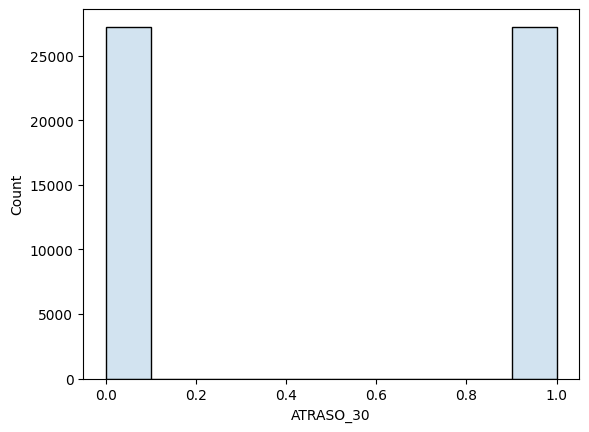

In [ ]:
sns.histplot(y_train_resampled,bins=10, alpha=0.2)

In [ ]:
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=10,  # Número de combinaciones aleatorias de hiperparámetros a probar
    scoring='accuracy',
    cv=5,  # Número de divisiones para la validación cruzada
    verbose=1,
    n_jobs=-1
)

In [ ]:
random_search.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7848b97cba60>,
                                        'fit_intercept': [True, False],
                                        'max_iter': array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy', verbose=1)

In [ ]:
best_model = random_search.best_estimator_
best_model

LogisticRegression(C=0.33876758342609703, fit_intercept=False, max_iter=600)

In [ ]:
accuracy = best_model.score(x_test, y_test)
accuracy

0.8254832852718146

In [ ]:
accuracy_scores.append(accuracy)

In [ ]:
resultados_prueba = best_model.predict(x_test)

In [ ]:
from sklearn.metrics import f1_score
score_f1 = f1_score(resultados_prueba, y_test)
score_f1*100

71.59248956884562

In [ ]:
from sklearn.metrics import recall_score
score_recall = recall_score(resultados_prueba, y_test)
#score_recall*100

In [ ]:
score_recall

0.6460621273925322

In [ ]:
f1_scores.append(score_f1*100)
recall_scores.append(score_recall*100)

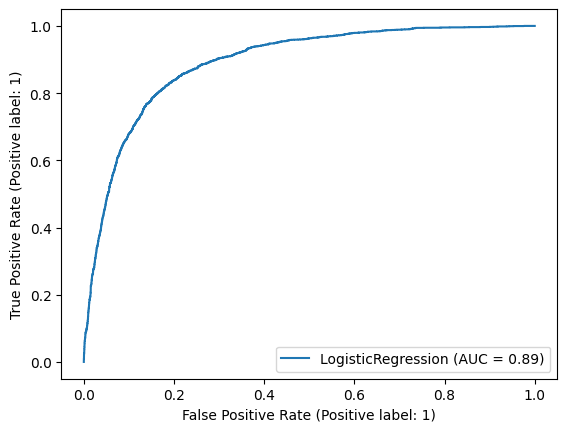

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(
   best_model, x_test, y_test)

# **Entrenamiento con XGBOOST**

In [ ]:
import xgboost as xgb

In [ ]:
# Define the XGBoost classifier
model = xgb.XGBClassifier(
    objective='binary:logistic',  # For binary classification
    n_estimators=100,  # Number of boosting rounds (trees)
    max_depth=3,  # Maximum tree depth
    learning_rate=0.1,  # Step size shrinkage to prevent overfitting
    subsample=0.8,  # Fraction of training data used in each boosting round
    colsample_bytree=0.8,  # Fraction of features used in each boosting round
    random_state=42
)

In [ ]:
model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
resultados_prueba = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, resultados_prueba)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.97


In [ ]:
accuracy_scores.append(accuracy)

In [ ]:
from sklearn.metrics import roc_auc_score
accuracy_roc = roc_auc_score(y_test, resultados_prueba, average=None)
accuracy_roc*100

96.46969610945084

In [ ]:
from sklearn.metrics import f1_score
score_f1 = f1_score(resultados_prueba, y_test)
f1_scores.append(score_f1*100)
score_f1*100


94.07718761941155

In [ ]:
from sklearn.metrics import recall_score
score_recall = recall_score(resultados_prueba, y_test)
recall_scores.append(score_recall*100)
score_recall*100

92.24428624953165

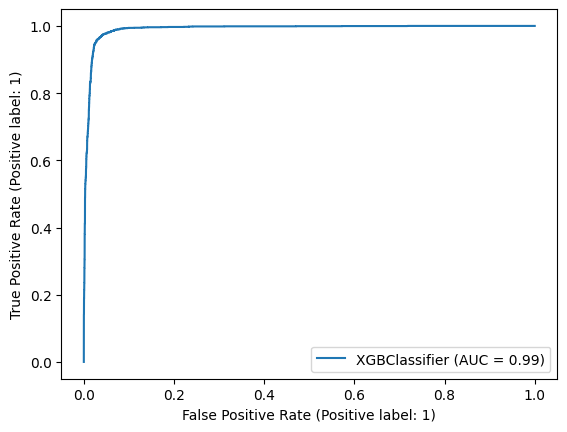

In [ ]:
RocCurveDisplay.from_estimator(
   model, x_test, y_test)

# **Entrenamiento con LightGBM**

In [ ]:
from lightgbm import LGBMClassifier, plot_importance

In [ ]:
modelo = LGBMClassifier()

In [ ]:
parameters = {
    'is_unbalance' : [True, None],
    'num_iterations' : range(1, 300),
    'num_leaves':  range(1, 300),
    'max_depth': range(1, 15)
}

In [ ]:
rand_est = RandomizedSearchCV(modelo, parameters, n_iter=50, cv=6, scoring='accuracy')

In [ ]:
rand_est.fit(X_train_resampled, y_train_resampled)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019990 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019855 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026929 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021028 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027008 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020323 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019532 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022371 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026925 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019586 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026742 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021705 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019547 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027494 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019905 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020445 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020602 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025695 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026693 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026953 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020835 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027633 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.048190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019800 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026986 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020663 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026981 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020503 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019973 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020554 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022899 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019792 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019631 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027642 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025966 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026985 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019819 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020235 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020353 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019738 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026833 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021960 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019953 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019429 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020359 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027528 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019695 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019898 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019633 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029896 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020243 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020872 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019745 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026794 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019689 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029974 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019597 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020490 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025925 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.050102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024834 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019526 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020028 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020482 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020232 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021788 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021735 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020752 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020245 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019828 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020890 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027910 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020232 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020235 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020696 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020958 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019455 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027233 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026884 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019835 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020041 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020736 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022963 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026848 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020899 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019790 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020533 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026999 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019587 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019563 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020447 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020388 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019633 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021545 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019991 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020611 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027759 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019543 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020557 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023860 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019532 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019895 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020245 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026335 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027292 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026886 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027429 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020659 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019812 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026701 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019792 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022034 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6176
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 45378, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22690, number of negative: 22689
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020856 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6171
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22689, number of negative: 22690
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030612 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 45379, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499989 -> initscore=-0.000044
[LightGBM] [Info] Start training from score -0.000044


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 27227, number of negative: 27227
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6175
[LightGBM] [Info] Number of data points in the train set: 54454, number of used features: 49
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


RandomizedSearchCV(cv=6, estimator=LGBMClassifier(), n_iter=50,
                   param_distributions={'is_unbalance': [True, None],
                                        'max_depth': range(1, 15),
                                        'num_iterations': range(1, 300),
                                        'num_leaves': range(1, 300)},
                   scoring='accuracy')

In [ ]:
modelo = rand_est.best_estimator_

In [ ]:
resultados_prueba = modelo.predict(x_test)

In [ ]:
accuracy=accuracy_score(resultados_prueba, y_test)
accuracy*100

97.94937520025633

In [ ]:
accuracy_scores.append(accuracy)

In [ ]:
accuracy_roc = roc_auc_score(y_test, resultados_prueba, average=None)
accuracy_roc*100

97.79884520559023

In [ ]:
from sklearn.metrics import f1_score
score_f1 = f1_score(resultados_prueba, y_test)
f1_scores.append(score_f1*100)
score_f1*100

96.30200308166408

In [ ]:
from sklearn.metrics import recall_score
score_recall = recall_score(resultados_prueba, y_test)
recall_scores.append(score_recall*100)
score_recall*100

95.1655881233346

<Axes: >

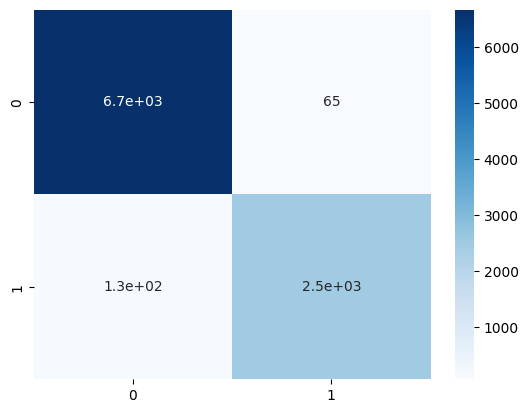

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion = confusion_matrix(resultados_prueba, y_test)
sns.heatmap(confusion, cmap='Blues',annot=True)

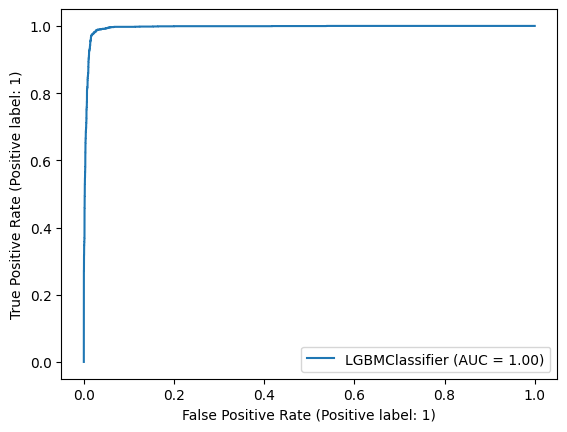

In [ ]:
RocCurveDisplay.from_estimator(
   modelo, x_test, y_test)

# **Entrenamiento con Redes Neuronales usando Tensorflow**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
early_stopping = EarlyStopping(monitor='accuracy', min_delta=0, patience=3, verbose=1, mode='max', baseline=0.96, restore_best_weights=True)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/10
1702/1702 [==============================] - 6s 3ms/step - loss: 0.4142 - accuracy: 0.8209 - val_loss: 0.3364 - val_accuracy: 0.8573
Epoch 2/10
1702/1702 [==============================] - 4s 2ms/step - loss: 0.2631 - accuracy: 0.8974 - val_loss: 0.2786 - val_accuracy: 0.8870
Epoch 3/10
1702/1702 [==============================] - 4s 2ms/step - loss: 0.1853 - accuracy: 0.9332 - val_loss: 0.1776 - val_accuracy: 0.9334
Epoch 4/10
1702/1702 [==============================] - 4s 2ms/step - loss: 0.1550 - accuracy: 0.9474 - val_loss: 0.1693 - val_accuracy: 0.9421
Epoch 5/10
1702/1702 [==============================] - 5s 3ms/step - loss: 0.1456 - accuracy: 0.9521 - val_loss: 0.2137 - val_accuracy: 0.9162
Epoch 6/10
1702/1702 [==============================] - 4s 2ms/step - loss: 0.1411 - accuracy: 0.9535 - val_loss: 0.1519 - val_accuracy: 0.9500
Epoch 7/10
1702/1702 [==============================] - 4s 2ms/step - loss: 0.1393 - accuracy: 0.9543 - val_loss: 0.1456 - val_accuracy:

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

293/293 [==============================] - 0s 1ms/step - loss: 0.1460 - accuracy: 0.9499


In [ ]:
predictions = model.predict(x_test)
predictions

293/293 [==============================] - 0s 1ms/step


array([[4.8569720e-05],
       [8.5775298e-01],
       [3.8281334e-10],
       ...,
       [2.2332584e-04],
       [1.4160693e-02],
       [9.9171644e-01]], dtype=float32)

In [ ]:
accuracy = model.evaluate(x_test, y_test)[1]
accuracy_scores.append(accuracy)
accuracy

293/293 [==============================] - 1s 2ms/step - loss: 0.1460 - accuracy: 0.9499


0.9499092102050781

In [ ]:
y_pred_binary = (predictions > 0.5).astype(int)

In [ ]:
f1 = f1_score(y_pred_binary, y_test)
f1_scores.append(f1*100)
print(f1)
recall = recall_score(y_test, y_pred_binary)
recall_scores.append(recall*100)
print(recall)

0.9117591721542803
0.9446393762183236


In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = model.predict(x_test)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
roc_auc

293/293 [==============================] - 0s 1ms/step


0.983614834543126

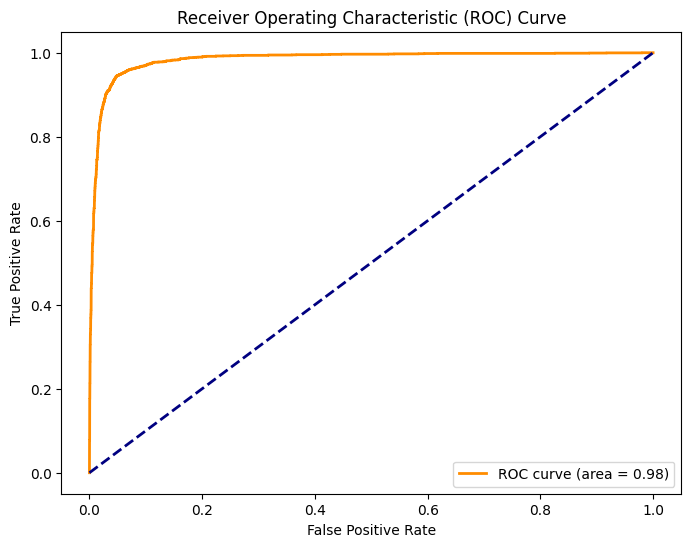

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# **Evaluación de los modelos**

In [ ]:
classifier_names=['Logistic Regression','XGBoost','Lightgbm', 'Redes Neuronales']
def compare_scores(classifier_names,accuracy_scores,f1_scores,recall_scores,colors):
  # Create separate subplots for accuracy, F1 score, and recall
  fig, axes = plt.subplots(1, 3, figsize=(25, 5))

  # Plot Accuracy
  axes[0].barh(classifier_names, accuracy_scores, color= [colors[i] for i in range(len(classifier_names))])
  axes[0].set_xlabel('Accuracy')
  axes[0].set_title('Model Accuracy')
  for i, v in enumerate(accuracy_scores):
    axes[0].text(v, i, f' {v:.2f}', color='black', va='center')

  # Plot F1 Score
  axes[1].barh(classifier_names, f1_scores, color=[colors[i] for i in range(len(classifier_names))])
  axes[1].set_xlabel('F1 Score')
  axes[1].set_title('F1 Score')
  for i, v in enumerate(f1_scores):
        axes[1].text(v, i, f' {v:.2f}', color='black', va='center')

  # Plot Recall
  axes[2].barh(classifier_names, recall_scores, color= [colors[i] for i in range(len(classifier_names))])
  axes[2].set_xlabel('Recall')
  axes[2].set_title('Recall')
  for i, v in enumerate(recall_scores):
        axes[2].text(v, i, f' {v:.2f}', color='black', va='center')

  # Invert y-axes for better readability
  for ax in axes:
      ax.invert_yaxis()

  plt.tight_layout()
  plt.show()

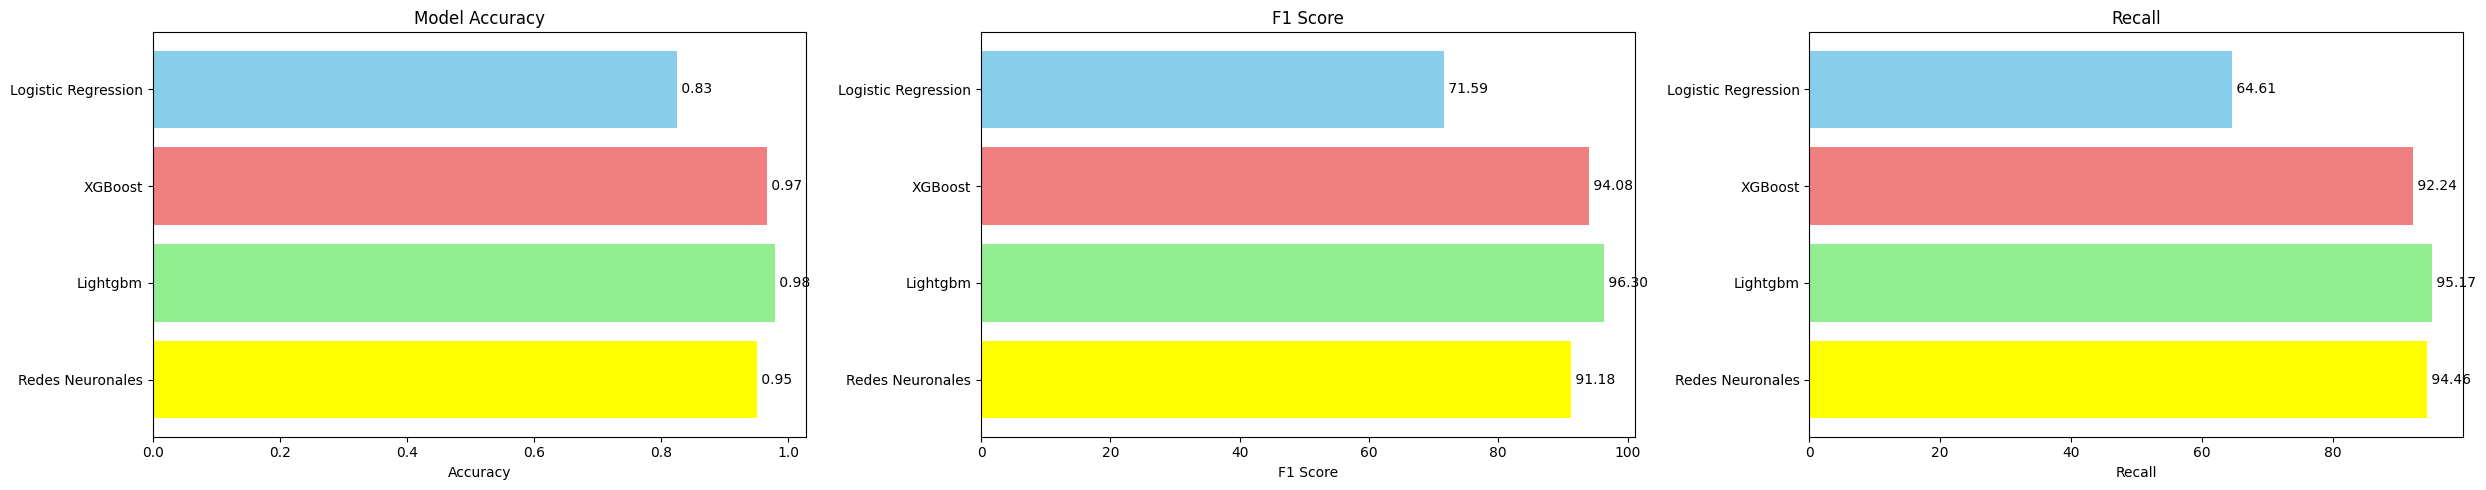

In [ ]:
colors=['skyblue', 'lightcoral', 'lightgreen', 'yellow']
compare_scores(classifier_names,accuracy_scores,f1_scores,recall_scores,colors)